### **i. INTRODUCTION**

---
Program ini dibuat untuk melakukan analisa terhadap masalah yang dimiliki oleh suatu perusahaan e-commerce. Adanya tren negatif pada penghasilan e-commerce menjadi perhatian pemangku usaha. Tujuan akhir dari program ini adalah untuk memperbaiki faktor-faktor  
yang menjadi penyebab penurunan pendapatan perusahaan.

---

### **ii. PROBLEM IDENTIFICATION**

 **Data Source** :  
 
 Website    : Kaggle  
  Link       : https://www.kaggle.com/datasets/ahmedaliraja/e-commerece-sales-data-2023-24/data


##### **ii.a. PROLOGUE**

Adanya persaingan yang semakin ketat di industri e-commerce, perusahaan menghadapi tantangan dengan turunnya tren pendapatan secara konsisten. Hal ini terdeteksi dengan adanya fluktuasi dalam pola belanja pelanggan di e-commerce tertentu. 

##### **ii.b. BUSINESS UNDERSTANDING**

Untuk mengidentifikasi kasus yang dimiliki, maka dirancang **SMART Framework** dengan rincian sebagai berikut :


- **SPECIFIC** :   
  Mengoptimalkan pengalaman belanja para pelanggan dan meningkatkan pendapatan dari penjualan di e-commerce.
   
- **MEASURABLE** :  
  Mencapai peningkatan pendapatan dalam penjualan hingga 15%.

- **ACHIEVABLE** :  
  Menyesuaikan promosi dan iklan dengan perilaku pelanggan pada kategori produk tertentu untuk memberikan preferensi yang sesuai dengan praktik dalam berbelanja serta meningkatkan kualitas produk.

- **RELEVANT** :  
  Dengan fokus untuk tepat sasaran dalam meningkatkan kepuasan pelanggan, penghasilan yang didapatkan akan lebih tinggi.

- **TIME-BOUND** :  
  Akan dicapai hasil dalam waktu 3 bulan.  

**PROBLEM STATEMENT**  
  Target yang ingin dicapai ialah meningkatkan kepuasan pelanggan dalam berbelanja di e-commerce selama kurun waktu 3 bulan. Hal ini akan dicapai dengan memperluas iklan serta promosi kepada pelanggan sesuai dengan perilaku pembeli dalam berbelanja. Selain itu, target akan dicapai dengan meningkatkan kualitas produk yang tertera dalam e-commerce sehingga pada akhirnya akan menghasilkan pendapatan yang lebih tinggi sebesar 15%.

##### **ii.c. BREAKING DOWN THE PROBLEM**

Masalah utama: `Mengoptimalkan kepuasan pengalaman berbelanja pelanggan e-commerce`

Untuk memudahkan analisis dan menyelesaikan masalah, kita perlu memahami detail tentang masalah tersebut.

- Kategori produk apakah yang paling diminati oleh pelanggan?
- Siapakah pelanggan yang paling sering menggunakan promo? 
- Siapa pelanggan yang lebih banyak untuk men-subscribe platform e-commerce?
- Metode pembayaran apa yang diminati oleh pelanggan?
- Bagaimana rata-rata total pembelian dan rating produk?    
- Apakah diskon berpengaruh signifikan terhadap total pembelian?
- Faktor-faktor apa saja yang dapat mengarah pada pengoptimalan pengalaman belanja? 

### **iii. DATA LOADING**

Pada bagian ini akan dilakukan loading dataset yang akan digunakan dalam analisa. Terdapat 3 buah file dataset diantaranya:
- customer details
- data penjualan
- product details

In [35]:
import pandas as pd  # import pandas
import numpy as np   # import numpy

# CUSTOMER DETAILS

cd = pd.read_csv("customer_details.csv") #load file customer_details.csv
cd.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [36]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Pada tabel customer_details terdapat 17 kolom. Terlihat tidak ada baris yang memiliki missing value, seluruh kolom di dalamnya juga dapat digunakan, sehingga tabel ini bisa kita jadikan tabel utama. Untuk hal data type, tabel ini sudah memiliki tipe data yang sesuai untuk setiap kolomnya. Maka, tabel ini tidak memerlukan tahap cleaning. 

In [37]:
# SALES DATA

sd = pd.read_csv("sales_data.csv") #load file e_commerce_sales_data.csv
sd.head()

,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN


In [38]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           2999 non-null   float64
 1   product id        2999 non-null   object 
 2   Interaction type  2871 non-null   object 
 3   Time stamp        2999 non-null   object 
 4   Unnamed: 4        0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 128.8+ KB


Terdapat perbedaan antara data yang tersedia dengan data non-null. Maka pada tabel ini bisa kita lakukan drop missing value. Kemudian untuk kolom time stamp, perlu kita lakukan split antara tanggal dan waktunya menjadi 2 kolom. Terdapat pula komom unnamed berisi missing value yang perlu kita take-out dari tabel.

In [39]:
# PRODUCT DETAILS

dp = pd.read_csv("product_details.csv") #load file product_details.csv
dp.head()

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [40]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniqe Id               10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8230 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

Oleh karena dalam tabel product_details ini terdapat nilai missing value dan kolom tersebut tidak terlalu berpengaruh dalam analisis, maka kolom-kolom tersebut dapat kita hilangkan dari tabel. Kita juga dapat menghilangkan kolom image dan url karena tidak dibutuhkan dalam analisis kali ini.

Selanjutnya, sebelum melakukan penggabungan data, kita perlu cleaning data terlebih dahulu agar lebih efisien.

### **iv. DATA CLEANING**

In [41]:
# CLEANING DATA SALES DATA (SD)
import pandas as pd

sd = sd.drop(sd.columns[-1], axis=1)                                        # menghapus kolom terakhir
sd[['Date','Time']] = sd['Time stamp'].str.split(' ', n=1, expand = True)   # memisahkan tanggal dan waktu
sd = sd.drop(columns=['Time stamp'])                                        # menghapus kolom Time stamp
sd['Date'] = pd.to_datetime(sd['Date'], format='%d/%m/%Y')
sd['Time'] = pd.to_datetime(sd['Time'], format='%H:%M').dt.time
sd = sd.dropna()                                                            # menghapus baris missing value
sd


,user id,product id,Interaction type,Date,Time
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,2023-10-10,08:00:00
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,2023-10-11,08:00:00
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,2023-10-12,08:00:00
3,4.0,18018b6bc416dab347b1b7db79994afa,view,2023-10-13,08:00:00
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,2023-10-14,08:00:00
...,...,...,...,...,...
2994,2995.0,f5149cfb8e04d7b30bd7b4eaed6713b8,like,2023-12-15,08:00:00
2995,2996.0,82318e8acf79bbeb3cf685a2732fb630,view,2023-12-16,08:00:00
2996,2997.0,19d150365d798db47cccf1622b6ad754,purchase,2023-12-17,08:00:00
2997,2998.0,136c0aff3ab56bd3d138775fe90ef970,view,2023-12-18,08:00:00


In [42]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2871 entries, 0 to 2998
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user id           2871 non-null   float64       
 1   product id        2871 non-null   object        
 2   Interaction type  2871 non-null   object        
 3   Date              2871 non-null   datetime64[ns]
 4   Time              2871 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 134.6+ KB


Data telah sesuai dengan kebutuhan baik dari nilai di dalam tabel dan tipe datanya.

In [43]:
# CLEANING DATA PD

dp = dp.dropna(axis=1)                          # menghapus kolom yang memiliki nilai NaN
dp = dp.drop(columns=['Image', 'Product Url'])  # menghapus kolom image dan url yang tidak digunakan
dp

,Uniqe Id,Product Name,Is Amazon Seller
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",Y
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",Y
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,Y
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,Y
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,Y
...,...,...,...
9997,1a22f23576bfdfe5ed6c887dc117aab6,Remedia Publications REM536B Money Activity Bo...,Y
9998,e11514dcf1f087887cd5ea0bd646d1fc,Trends International NFL La Chargers HG - Mobi...,Y
9999,c00301a38560da2abc89c1f86ce4b267,NewPath Learning 10 Piece Science Owls and Owl...,Y
10000,c2928dbf9796ceba44863a2736afb405,Disney Princess Do It Yourself Braid Set,Y


In [44]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Uniqe Id          10002 non-null  object
 1   Product Name      10002 non-null  object
 2   Is Amazon Seller  10002 non-null  object
dtypes: object(3)
memory usage: 234.6+ KB


Data telah sesuai dengan kebutuhan baik dari nilai di dalam tabel dan tipe datanya. Setelah di cleaning, saatnya kita gabungkan ketiga tabel menjadi 1 tabel utama.

In [45]:
df = pd.merge(cd, sd, left_on='Customer ID', right_on='user id', how='outer') # menggabung tabel customer details dan sales data
df = pd.merge(df, dp, left_on='product id', right_on='Uniqe Id', how='outer') # menggabung tabel df dengan product details
df = df.drop(columns=['product id', 'Uniqe Id'])                              # menghapus kolom product id dan unique id
df = df.dropna()                                                              # menghapus row dengan missing value                      
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,user id,Interaction type,Date,Time,Product Name,Is Amazon Seller
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Yes,14.0,Venmo,Fortnightly,1.0,purchase,2023-10-10,08:00:00,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",Y
1,2.0,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,...,Yes,2.0,Cash,Fortnightly,2.0,view,2023-10-11,08:00:00,"Electronic Snap Circuits Mini Kits Classpack, ...",Y
2,3.0,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,...,Yes,23.0,Credit Card,Weekly,3.0,like,2023-10-12,08:00:00,3Doodler Create Flexy 3D Printing Filament Ref...,Y
3,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,...,Yes,49.0,PayPal,Weekly,4.0,view,2023-10-13,08:00:00,Guillow Airplane Design Studio with Travel Cas...,Y
4,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,...,Yes,31.0,PayPal,Annually,5.0,like,2023-10-14,08:00:00,Woodstock- Collage 500 pc Puzzle,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,2995.0,69.0,Female,Sweater,Clothing,100.0,Nevada,S,White,Winter,...,No,14.0,Bank Transfer,Quarterly,2995.0,like,2023-12-15,08:00:00,Bandito MT 2.8 1/10 RC Monster Truck Tires wit...,Y
3896,2996.0,29.0,Female,Jeans,Clothing,96.0,Virginia,M,Orange,Summer,...,No,42.0,Debit Card,Bi-Weekly,2996.0,view,2023-12-16,08:00:00,Steiff Baby Teddy & Me Teddy Bear Boy with Paj...,Y
3897,2997.0,70.0,Female,Jewelry,Accessories,91.0,Utah,M,White,Spring,...,No,6.0,Venmo,Every 3 Months,2997.0,purchase,2023-12-17,08:00:00,uxcell 1500 A12121200ux0003-10000RPM DC3-12V H...,Y
3898,2998.0,41.0,Female,Sweater,Clothing,40.0,Idaho,S,Yellow,Spring,...,No,14.0,Venmo,Every 3 Months,2998.0,view,2023-12-18,08:00:00,Zvezda 5023 - 1/72 German King Tiger Ausf B He...,Y


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2871 entries, 0 to 3899
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer ID             2871 non-null   float64       
 1   Age                     2871 non-null   float64       
 2   Gender                  2871 non-null   object        
 3   Item Purchased          2871 non-null   object        
 4   Category                2871 non-null   object        
 5   Purchase Amount (USD)   2871 non-null   float64       
 6   Location                2871 non-null   object        
 7   Size                    2871 non-null   object        
 8   Color                   2871 non-null   object        
 9   Season                  2871 non-null   object        
 10  Review Rating           2871 non-null   float64       
 11  Subscription Status     2871 non-null   object        
 12  Shipping Type           2871 non-null   object       

Hasil penggabungan ketiga tabel didapatkan sebanyak 23 kolom dan 2871 baris. Setelah seluruh data telah sesuai baik dari segi isi datanya dan juga tipe data, maka dapat dilanjutkan dengan analisis data.

### **v. DATA ANALYSIS**

Dalam mengoptimalkan kepuasan pengalaman berbelanja pelanggan, kita perlu mengetahui kira-kira kategori barang apa yang diminati pelanggan agar kita bisa lebih tepat sasaran untuk memberikan pelayanan kepada mereka.

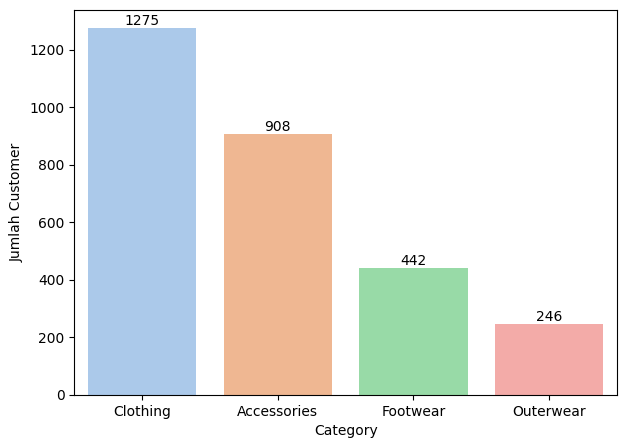

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(7, 5))
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Jumlah Customer']
ax = sns.barplot(x = 'Category',y = 'Jumlah Customer', data = category_counts, palette = "pastel")

for bars in ax.containers:
    ax.bar_label(bars)

Dari diagram tersebut terlihat bahwa kategori Clothing paling diminati oleh customer yaitu mencapai 1275 cusomer. Selanjutnya, kita perlu melihat lokasi mana tempat para pelanggan berasal yang paling sering berbelanja.

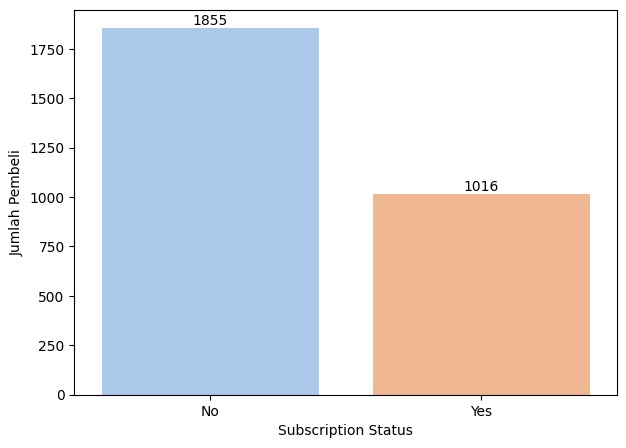

In [48]:
plt.figure(figsize=(7, 5))
location_counts = df['Subscription Status'].value_counts().reset_index()
location_counts.columns = ['Subscription Status', 'Jumlah Pembeli']
ax = sns.barplot(x = 'Subscription Status',y = 'Jumlah Pembeli', data = location_counts, palette = "pastel")

for bars in ax.containers:
    ax.bar_label(bars)

Customer dari e-commerce lebih cenderung tidak melakukan subscription. Selanjutnya mari kita lihat bagaimana perilaku customer terhadap penggunaan diskon.

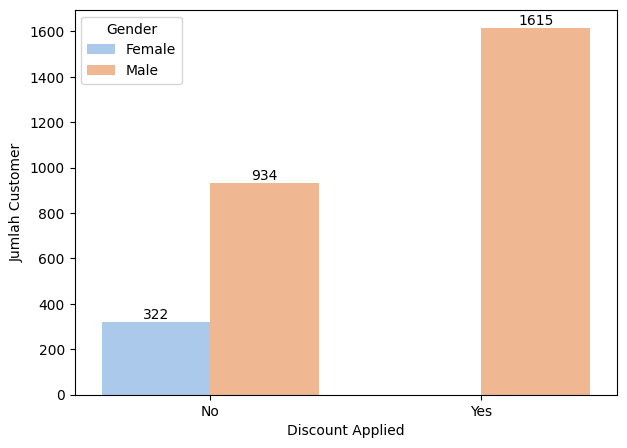

In [49]:
plt.figure(figsize=(7, 5))
location_counts = df.groupby(['Discount Applied', 'Gender']).size().reset_index(name='Jumlah Customer')
ax = sns.barplot(x = 'Discount Applied',y = 'Jumlah Customer', hue = 'Gender', data = location_counts, palette = "pastel")
for bars in ax.containers:
    ax.bar_label(bars)

Ternyata, diketahui bahwa wanita lebih memilih tidak menggunakan diskon dalam proses belanja. Lalu, kita akan melihat metode pembayaran apa yang diminati customer.

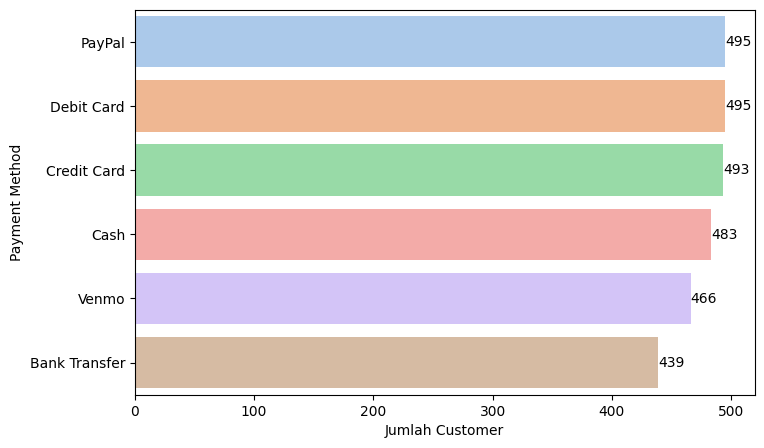

In [50]:
plt.figure(figsize=(8, 5))
location_counts = df['Payment Method'].value_counts().reset_index()
location_counts.columns = ['Payment Method', 'Jumlah Customer']
ax = sns.barplot(x = 'Jumlah Customer',y = 'Payment Method', data = location_counts, palette = "pastel")
for bars in ax.containers:
    ax.bar_label(bars)

Dari hasil ini didapatkan setiap metode pembayaran cenderung memiliki jumlah pengguna yang sama. Lalu, kita perlu melihat bagaimmana nilai rata-rata dari jumlah pembelian, rating, dan usia para pembeli.

In [51]:
from scipy.stats import skew, kurtosis

kolom = ['Purchase Amount (USD)','Review Rating','Age']

ct = {
    'Column': [],
    'Mean': [],
    'Median': [],
    'Modus': [],
    'Skewness': [],
    'Kurtosis': [],
    'Std Deviasi': []
}

# Calculate statistics for each column
for col in kolom:
    ct['Column'].append(col)
    ct['Mean'].append(round(df[col].mean(),2))
    ct['Median'].append(round(df[col].median(),2))
    ct['Modus'].append(df[col].mode()[0])  # Take the first mode
    ct['Std Deviasi'].append(round(df[col].std(),2))
    ct['Skewness'].append(round(skew(df[col]),2))
    ct['Kurtosis'].append(round(kurtosis(df[col]),2))

ct = pd.DataFrame(ct)
ct

,Column,Mean,Median,Modus,Skewness,Kurtosis,Std Deviasi
0,Purchase Amount (USD),59.69,60.0,36.0,0.02,-1.25,23.80
1,Review Rating,3.75,3.7,3.4,0.01,-1.18,0.72
2,Age,44.11,44.0,69.0,-0.00,-1.20,15.27


Dari hasil atas, mari kita breakdown satu persatu :

1. **Purchase Amount (USD)**  
- Total pembelian customer rata-rata di angka 59.69 USD. 
        
- Nilai tengah total pembelian customer di angka 60 USD.
        
- Total yang dikeluarkan customer paling banyak sebesar 36 USD.
        
- Dapat telrihat bahwa pada kolom harga produk, `nilai Modus< nilai Mean< nilai Median`, artinya purchase amount kemungkinan memiliki distribusi miring ke kanan. Ini berarti ada beberapa pembelian yang sangat besar yang menarik rata-rata ke atas, sementara sebagian besar transaksi adalah lebih kecil.

- Nilai skewness menunjukkan positif yang berarti distribusi miring kanan, namun nilai skewed yang cenderung kecil mendekati nol berarti ada kemungkinan purchase amount memiliki distribusi normal.
        
- Nilai kurtosis dibawah 3 sehingga dinamakan Platykuctic atau memiliki puncak yang lebih landai dari distribusi normal. Hal ini menandai tidak ada banyak nilai ekstrim atau outliers dalam data.
        
- Nilai Standar Deviasi menunjukkan bahwa data memiliki variabilitas yang besar. Artinya, nilai-nilai dalam dataset tersebut bervariasi cukup jauh dari rata-ratanya.


2. **Review Rating**  
- Nilai rata-rata, nilai tengah dari usia memmiliki nilai yang hampir serupa namun memiliki nilai modus yang tinggi

- Nilai skewness menunjukkan positif yang berarti distribusi miring kanan, akan tetapi nilai skewed yang cenderung kecil mendekati nol berarti ada kemungkinan purchase amount memiliki distribusi normal.
        
- Nilai kurtosis dibawah 3 sehingga dinamakan Platykuctic atau memiliki puncak yang lebih landai dari distribusi normal. Hal ini menandai tidak ada banyak nilai ekstrim atau outliers dalam data.
        
- Nilai Standar Deviasi menunjukkan bahwa data memiliki variabilitas cukup kecil. Artinya, nilai-nilai dalam dataset tersebut bervariasi tidak jauh dari rata-ratanya.

3. **Age**  
- Nilai rata-rata, nilai tengah, nilai modus dari rating cenderung sama, artinya ada kecenderungan data ini memiliki distribusi normal

- Nilai skewness menunjukkan negatif yang berarti distribusi miring kiri akan tetapi nilai skewed yang cenderung kecil mendekati nol berarti ada kemungkinan purchase amount memiliki distribusi normal.
        
- Nilai kurtosis dibawah 3 sehingga dinamakan Platykuctic atau memiliki puncak yang lebih landai dari distribusi normal. Hal ini menandai tidak ada banyak nilai ekstrim atau outliers dalam data.
        
- Nilai Standar Deviasi menunjukkan bahwa data memiliki variabilitas yang besar. Artinya, nilai-nilai dalam dataset tersebut bervariasi cukup jauh dari rata-ratanya.

Selanjutnya, kita akan melihat apakah data memiliki outlier atau tidak

In [23]:
# OUTLIER HARGA PRODUK

# Mencari nilai rerata dan std
avg = df['Purchase Amount (USD)'].mean()
std = df['Purchase Amount (USD)'].std()
# Mencari nilai batas atas & batas bawah
up_bound = avg + 3*std  # mean + k*std
low_bound = avg - 3*std # mean - k*std

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

# OUTLIER -> nilainya dibawah batas bawah ATAU diatas batas atas
outlier = df['Purchase Amount (USD)'][(df['Purchase Amount (USD)']<low_bound) | (df['Purchase Amount (USD)']>up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["Purchase Amount (USD)"]):.2f}%')

print(f'Banyaknya Outlier:{len(outlier)}')

print(f'\nData Outlier:\n{outlier}')

Upper Boundary: 131.08
Lower Boundary: -11.71
Percentage of outliers: 0.00%
Banyaknya Outlier:0

Data Outlier:
Series([], Name: Purchase Amount (USD), dtype: float64)


Terbukti tidak ada outlier dalam data. Selanjutnya kita akan cek apakah ada korelasi antara review rating dan purchase amount.

In [24]:
correlation = df['Review Rating'].corr(df['Purchase Amount (USD)'])
print(f"Koefisien Korelasi: {correlation}")

Koefisien Korelasi: 0.03288751657606377


Oleh karena nilai korelasi mendekati 0, ini menunjukkan bahwa tidak ada hubungan linier yang signifikan antara rating dan jumlah pembelian. Dengan kata lain, perubahan dalam rating tidak secara konsisten mempengaruhi jumlah uang yang dihabiskan pelanggan. Hal ini bisa berarti bahwa faktor lain (seperti diskon, jenis produk, atau lainnya) yang mungkin lebih berpengaruh maka perlu dilakukan analisa lanjutan. Maka dari itu kita akan cek apakah penggunaan diskon berpengaruh terhadap jumlah pembelian.

In [58]:
from scipy import stats
from scipy.stats import skew, kurtosis

disc = df[df['Discount Applied']=='Yes']['Purchase Amount (USD)']
ndisc = df[df['Discount Applied']=='No']['Purchase Amount (USD)']

mean_disc = disc.mean().round(2)  
print(f'Rata-rata jumlah pembelian menggunakan diskon\t\t: {mean_disc}')
mean_nondisc = ndisc.mean().round(2) 
print(f'Rata-rata jumlah pembelian tidak menggunakan diskon\t: {mean_nondisc}')

t_stat, p_val = stats.ttest_ind(disc, ndisc)
print(f'P-value\t\t:{p_val}')

if p_val<0.05:
    print('\nKeputusan :')
    print('  H0 berhasil di tolak')
    print('Kesimpulan :')
    print('  Rata-rata jumlah pembelian menggunakan diskon != tidak menggunakan diskon')
else :
    print('\nKeputusan :')
    print('  H0 gagal di tolak')
    print('Kesimpulan :')
    print('  Rata-rata jumlah pembelian menggunakan diskon == tidak menggunakan diskon')

Rata-rata jumlah pembelian menggunakan diskon		: 59.42
Rata-rata jumlah pembelian tidak menggunakan diskon	: 60.02
P-value		:0.5040541805623397

Keputusan :
  H0 gagal di tolak
Kesimpulan :
  Rata-rata jumlah pembelian menggunakan diskon == tidak menggunakan diskon


Dari hasil ini didapatkan bahwa adanya diskon tidak cukup memengaruhi jumlah pembelian, hal ini terjadi mungkin diskon yang diterapkan tidak cukup menarik bagi pelanggan atau tidak berkontribusi pada peningkatan pembelian. Ada kemungkinan faktor lain yang lebih berpengaruh dalam menentukan berapa banyak yang dihabiskan pelanggan, seperti kualitas produk, preferensi pribadi, atau faktor eksternal lainnya.

Tujuan kita adalah ingin meningkatkan pengalaman belanja para customer dengan melalui promo atau diskon kepada sasaran yang tepat, maka kita perlu mencari tahu faktor-faktor apa yang dapat mengarah pada peningkatan pengalaman belanja customer melalui pemberian diskon. Kita akan melakukan uji chi-kuadrat karena kita ingin menguji hubungan antara dua data kategorik. 

Untuk melakukan pengujian, kita perlu mendefinisikan hipotesis:

H0  : Suatu variabel dan penggunaan diskon bersifat independen

H1  : Suatu variabel dan penggunaan diskon saling bergantung

Kami akan menggunakan tingkat keyakinan 95%.

In [60]:
cols = df.drop(columns=['Promo Code Used','Discount Applied','Customer ID','Age','Purchase Amount (USD)','Previous Purchases','user id','Date','Time', 'Product Name','Review Rating']).columns

results = []
for col in cols:
  cross = pd.crosstab(df[col],df['Discount Applied'])   # membentuk tabel kontingensi
  pval = stats.chi2_contingency(cross).pvalue           # menghitung p-value
  prompt = "Yes" if pval<0.05 else "No"
  results.append([col, pval, prompt])                   # menyimpan hasil ke dalam list

# hasil dalam tabel
result_df = pd.DataFrame(results, columns=["Variable", "P-Value", "Dependent"])
result_df

,Variable,P-Value,Dependent
0,Gender,7.275025e-103,Yes
1,Item Purchased,3.039162e-01,No
2,Category,5.748464e-01,No
3,Location,9.388093e-01,No
4,Size,7.203462e-01,No
5,Color,8.286331e-01,No
6,Season,6.703207e-01,No
7,Subscription Status,2.514971e-267,Yes
8,Shipping Type,7.919189e-01,No
9,Payment Method,5.193702e-01,No


Hasil ini menunjukkan bahwa ada hubungan yang kuat antara jenis kelamin dan penggunaan diskon. Ini berarti gender mempengaruhi keputusan pelanggan untuk menggunakan diskon. Sama halnya dengan Subscription Status, menunjukkan bahwa status langganan memiliki pengaruh yang kuat terhadap penggunaan diskon. Pelanggan yang memiliki status langganan cenderung menggunakan diskon lebih sering. Untuk mengeksplorasi cara kerja hubungan variabel dan diskon, kita perlu menghitung tingkat diskon dengan mengukur rata-rata.

In [61]:
dfa = df.copy()
df['Discount Applied'] = df['Discount Applied'].replace({'Yes':1,'No':0})
df['Discount Applied'].head()

0    1
1    1
2    1
3    1
4    1
Name: Discount Applied, dtype: int64

In [62]:
df.groupby('Gender')[['Discount Applied']].mean()

,Discount Applied
Gender,
Female,0.000000
Male,0.633582


Ini menunjukkan bahwa tidak ada wanita yang menggunakan diskon. Dengan kata lain, semua transaksi yang dilakukan oleh pelanggan wanita tidak melibatkan penggunaan diskon sama sekali sedangkan untuk pria lebih banyak menggunakan diskon. Mengingat bahwa diskon lebih banyak digunakan oleh pria, kita mungkin ingin mempertimbangkan untuk merancang kampanye promosi yang lebih menarik bagi pelanggan wanita. Misalnya, menawarkan jenis diskon atau promosi yang berbeda yang dapat menarik perhatian wanita.

In [63]:
df.groupby('Subscription Status')[['Discount Applied']].mean()

,Discount Applied
Subscription Status,
No,0.322911
Yes,1.000000


Mengingat bahwa semua pelanggan yang berlangganan menggunakan diskon, kita bisa mempertimbangkan untuk menawarkan program langganan yang lebih menarik, atau bahkan meningkatkan insentif atau promosi tertentu untuk pelanggan yang belum berlangganan agar mereka tertarik untuk mendaftar.

### **vi.CONCLUSION**

Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa :

1. Data menunjukkan bahwa pria lebih cenderung menggunakan diskon dibandingkan wanita, dengan rincian :
    - Rata-rata penggunaan diskon pria mencapai sekitar 63.36% 
    - Wanita tidak menggunakan diskon sama sekali 
    - Hal ini menunjukkan bahwa strategi promosi perlu lebih ditargetkan untuk menarik pelanggan wanita 
    - Rekomendasi yang dapat dipertimbangkan adalah dengan pemberian program khusus wanita seperti memberikan harga bundling untuk produk-produk tertentu, selain itu juga dapat memberikan voucher discount agar para pelanggan lebih tertarik untuk berbelanja.
2. Pelanggan yang berlangganan menggunakan diskon secara konsisten. Berikut rinciannya :
    - Pelanggan yang berlangganan menggunakan diskon 100% dari transaksi
    - Pelanggan yang tidak berlangganan menggunakan diskon hanya 32.29% 
    - Hal ini menunjukkan bahwa program langganan sangat efektif dalam mendorong penggunaan diskon dan bisa menjadi alat untuk meningkatkan kesetiaan pelanggan
    - Rekomendasi yang dapat dipertimbangkan adalah dengan memberikan program bagi pelanggan yang mengajak rekannya untuk mensubscribe akan diberikan poin atau penawaran diskon eksklusif, program loyalitas, dan tawaran bundling.
3. Analisis ini menekankan pentingnya segmentasi dalam strategi pemasaran. Memahami perilaku dan preferensi pelanggan berdasarkan gender dan status langganan dapat membantu merumuskan strategi yang lebih tepat sasaran.
4. Improvement yang dapat dilakukan :
    - Perlu adanya analisa yang lebih mendalam mengenai faktor-faktor lain yang mungkin mempengaruhi penggunaan diskon. 
    - Jumlah informasi dan data yang diperoleh juga akan mempengaruhi hasil analisis. 
    - Diharapkan dengan adanya diskon ini menarik lebih banyak pelanggan e-commerce sehingga secara linear akan meningkatkan pengalaman belanja pelanggan serta memaksimalkan pendapatan perusahaan.

In [64]:
df.to_csv('data_penjualan.csv', index=False)